In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

2022-11-08 17:51:12.490334: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-08 17:51:12.828747: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-08 17:51:12.828775: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-08 17:51:12.877891: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-08 17:51:14.673402: W tensorflow/stream_executor/platform/de

In [7]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

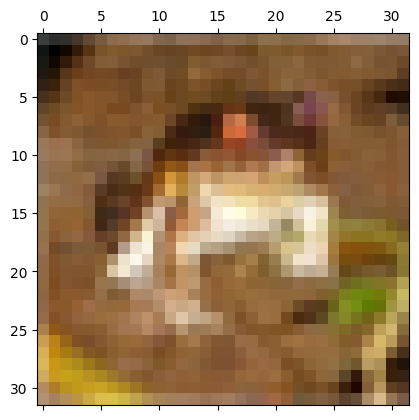

In [8]:
plt.matshow(X_train[0])

In [9]:
X_train_scaled = np.array(X_train)/255
X_test_scaled = np.array(X_test)/255

In [10]:
X_train_scaled[0].shape

(32, 32, 3)

In [11]:
y_test.shape

(10000, 1)

In [12]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [15]:
def get_model(X,y,e):
    model = Sequential([
        layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),
        layers.MaxPooling2D((2,2),padding='same'),
        layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2),padding='same'),
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(10,activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    model.fit(X,y,epochs=e)
    return model

In [17]:
model = get_model(X_train_scaled,y_train,10)

Epoch 1/10


2022-11-08 17:59:13.260637: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 30s 18ms/step - loss: 1.4770 - accuracy: 0.4640
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1102 - accuracy: 0.6089
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9663 - accuracy: 0.6610
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8782 - accuracy: 0.6937
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8074 - accuracy: 0.7163
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7569 - accuracy: 0.7342
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7083 - accuracy: 0.7505
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6656 - accuracy: 0.7666
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6212 - accuracy: 0.7821
Epoch 10/10
1563/1563 [==============================] - 35s 22ms/step - lo

In [18]:
model.evaluate(X_test_scaled,y_test)

2022-11-08 18:06:46.028623: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 5ms/step - loss: 0.9367 - accuracy: 0.7005


[0.9367183446884155, 0.7005000114440918]

In [19]:
y_pred = model.predict(X_test_scaled)

 13/313 [>.............................] - ETA: 1s 

2022-11-08 18:08:14.117616: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 5ms/step


In [20]:
classes[np.argmax(y_pred[0])]

'cat'

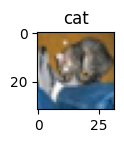

In [28]:
plt.figure(figsize=(1,1))
plt.title(classes[y_test[0][0]])
plt.imshow(X_test[0])

In [29]:
import pickle
with open('models/cifar10-cnn-model.pickle','wb') as f:
    pickle.dump(model,f)

INFO:tensorflow:Assets written to: ram://dfd9778f-3ce3-4f93-bce2-47c4613d3974/assets


INFO:tensorflow:Assets written to: ram://dfd9778f-3ce3-4f93-bce2-47c4613d3974/assets


In [30]:
pickle_in = open("./models/cifar10-cnn-model.pickle","rb")
loaded_model = pickle.load(pickle_in)

In [36]:
classes[np.argmax(loaded_model.predict(np.array([X_test_scaled[0]])))]

1/1 [==============================] - 0s 96ms/step


'cat'